In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image

In [2]:
image = cv2.imread('image1.jpg')

# Convert the image to grayscale

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier for faces

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image

In [5]:
faces = face_cascade.detectMultiScale(gray, 1.2, 7)

implement a function for perspective transformations

In [6]:
def warpPerspective(image, M, dsize):
    # Get size of input image
    h, w = image.shape[:2]

    # Create output image
    output = np.zeros((dsize[1], dsize[0], image.shape[2]), dtype=image.dtype)

    # Compute inverse transformation matrix
    M_inv = np.linalg.inv(M)

    # Iterate over pixels in output image
    for y in range(dsize[1]):
        for x in range(dsize[0]):
            # Compute corresponding pixel coordinates in input image
            p = np.array([x, y, 1])
            p = M_inv @ p
            p /= p[2]
            x2, y2 = int(p[0]), int(p[1])

            # Check if pixel coordinates are within bounds of input image
            if 0 <= x2 < w and 0 <= y2 < h:
                # Copy pixel value from input to output image
                output[y,x] = image[y2,x2]

    return output

implement a function for affine transformations

In [7]:
def warpAffine(image, M, dsize):
    # Get size of input image
    h, w = image.shape[:2]

    # Create output image
    output = np.zeros((dsize[1], dsize[0], image.shape[2]), dtype=image.dtype)

    # Compute inverse transformation matrix
    M_inv = np.linalg.inv(np.vstack((M, [0, 0, 1])))[:2]

    # Iterate over pixels in output image
    for y in range(dsize[1]):
        for x in range(dsize[0]):
            # Compute corresponding pixel coordinates in input image
            p = np.array([x, y, 1])
            p = M_inv @ p
            x2, y2 = int(p[0]), int(p[1])

            # Check if pixel coordinates are within bounds of input image
            if 0 <= x2 < w and 0 <= y2 < h:
                # Copy pixel value from input to output image
                output[y,x] = image[y2,x2]

    return output

# Iterate over the detected faces

In [8]:
image2 = image.copy()
for (x,y,w,h) in faces:
    # Extract the face region from the color image
    face_region = image[y:y+h, x:x+w]

    # Apply a simple transformation to the face region
    M = np.float32([[1, 0, 50], [0, 1, 50]])
    transformed_face = warpAffine(face_region, M, (w,h))

    # Replace the original face region with the transformed face
    image2[y:y+h, x:x+w] = transformed_face

# Display the resulting image

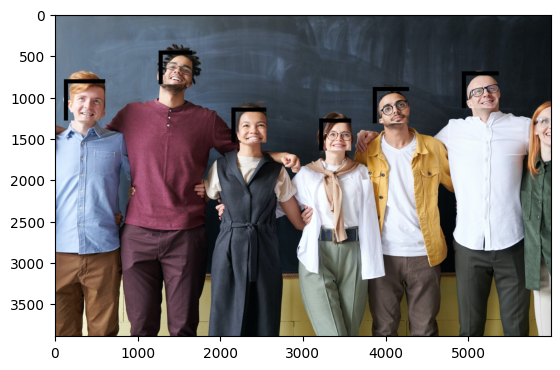

In [9]:
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [10]:
def getRotationMatrix2D(center, angle, scale):
    alpha = scale * np.cos(np.deg2rad(angle))
    beta = scale * np.sin(np.deg2rad(angle))

    M = np.array([[alpha, beta, (1 - alpha) * center[0] - beta * center[1]],
                  [-beta, alpha, beta * center[0] + (1 - alpha) * center[1]]])
    return M

image3 = image.copy()
for (x,y,w,h) in faces:
    # Extract the face region from the color image
    face_region = image[y:y+h, x:x+w]

    # Apply a rotation transformation to the face region
    center = (w / 2, h / 2)
    theta = 45
    M = getRotationMatrix2D(center, theta, 1.0)
    transformed_face = warpAffine(face_region, M, (w, h))

    # Replace the original face region with the transformed face
    image3[y:y+h, x:x+w] = transformed_face

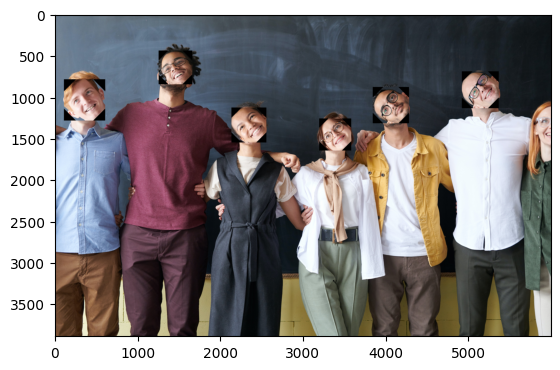

In [11]:
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))

In [12]:
M_scale = np.array([[0.5, 0, 0],
                    [0, 0.5, 0],
                    [0, 0, 1]])
M_shear = np.array([[1, 0.5, 0],
                    [0.5, 1, 0],
                    [0, 0, 1]])

In [13]:
image4 = image.copy()
for (x,y,w,h) in faces:
    # Extract face region from image
    face_region = image[y:y+h, x:x+w]

    # Apply scaling transformation to face region
    face_region = warpPerspective(face_region, M_scale, (w,h))

    # Replace original face region with transformed face region
    image4[y:y+h, x:x+w] = face_region

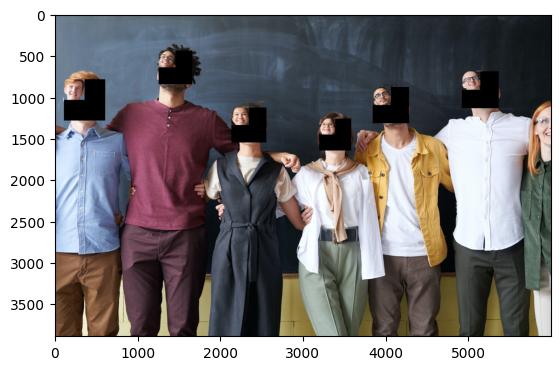

In [14]:
plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))

In [15]:
image5 = image.copy()
for (x,y,w,h) in faces:
    # Extract face region from image
    face_region = image[y:y+h, x:x+w]

    # Apply sheering transformation to face region
    face_region = warpPerspective(face_region, M_shear, (w,h))

    # Replace original face region with transformed face region
    image5[y:y+h, x:x+w] = face_region

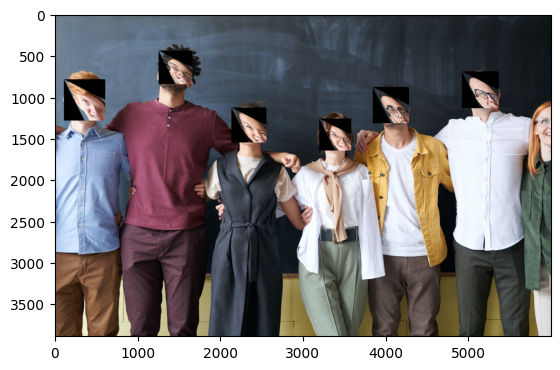

In [16]:
plt.imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))

In [19]:
image6 = image.copy()
for (x,y,w,h) in faces:
    # Extract face region from image
    face_region = image[y:y+h, x:x+w]

    # Apply sheering transformation to face region
    face_region = warpPerspective(face_region, M_shear, (w,h))

    # Apply scaling transformation to face region
    face_region = warpPerspective(face_region, M_scale, (w,h))

    # Replace original face region with transformed face region
    image6[y:y+h, x:x+w] = face_region

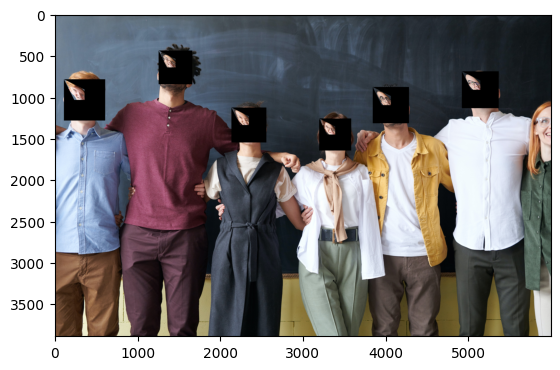

In [20]:
plt.imshow(cv2.cvtColor(image6, cv2.COLOR_BGR2RGB))

In [21]:
image7 = image.copy()
for (x,y,w,h) in faces:
    # Extract face region from image
    face_region = image[y:y+h, x:x+w]

    # Apply sheering transformation to face region
    face_region = warpPerspective(face_region, M_shear, (w,h))

    # Apply rotation transformation to face region
    center = (w / 2, h / 2)
    theta = 180
    M = getRotationMatrix2D(center, theta, 1.0)
    face_region = warpAffine(face_region, M, (w, h))

    # Replace original face region with transformed face region
    image7[y:y+h, x:x+w] = face_region

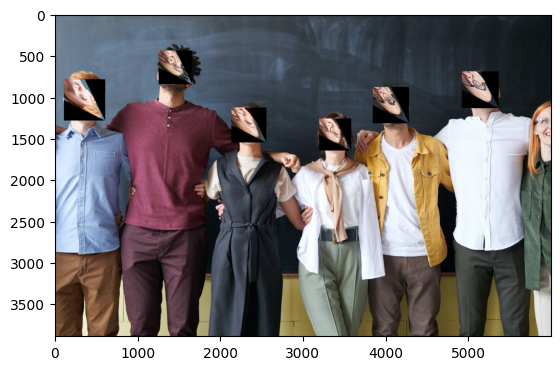

In [23]:
plt.imshow(cv2.cvtColor(image7, cv2.COLOR_BGR2RGB))